In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
distance = ctrl.Antecedent(np.arange(0, 1, 0.01), 'distance')
motor_1 = ctrl.Consequent(np.arange(0, 1, 0.01), 'motor_1')
motor_2 = ctrl.Consequent(np.arange(0, 1, 0.01), 'motor_2')

motor_1.defuzzify_method = 'mom'
motor_2.defuzzify_method = 'mom'

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
distance['very close'] = fuzz.trapmf(distance.universe, [0, 0, 0.100, 0.150])
distance['close'] = fuzz.trapmf(distance.universe, [0.100, 0.150, 0.350, 0.400])
distance['normal'] = fuzz.trapmf(distance.universe, [0.350, 0.400, 0.600, 0.650])
distance['far'] = fuzz.trapmf(distance.universe, [0.600, 0.650, 0.850, 0.900])
distance['very far'] = fuzz.trapmf(distance.universe, [0.850, 0.900, 1, 1])

# Output membership functions 
motor_1['medium'] = fuzz.gbellmf(motor_1.universe, 0.2, 2, 0)
motor_1['high'] = fuzz.gbellmf(motor_1.universe, 0.2, 2, 0.5)
motor_1['very high'] = fuzz.gbellmf(motor_1.universe, 0.2, 2, 1)

motor_2['medium'] = fuzz.gbellmf(motor_2.universe, 0.2, 2, 0)
motor_2['high'] = fuzz.gbellmf(motor_2.universe, 0.2, 2, 0.5)
motor_2['very high'] = fuzz.gbellmf(motor_2.universe, 0.2, 2, 1)

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


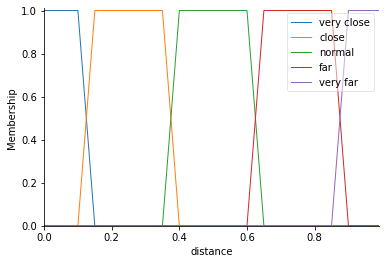

In [3]:
# You can see how these look with .view()
distance.view()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


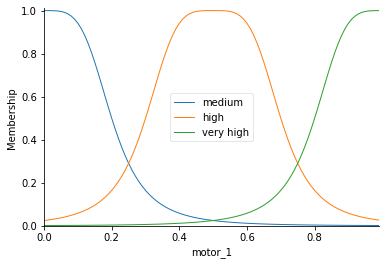

In [4]:
motor_1.view()

In [5]:
# Establish the rules for the system
rule1 = ctrl.Rule(distance['very close'], (motor_1['very high'], motor_2['medium']))   
rule2 = ctrl.Rule(distance['close'], (motor_1['high'], motor_2['medium']))
rule3 = ctrl.Rule(distance['normal'], (motor_1['medium'], motor_2['medium']))
rule4 = ctrl.Rule(distance['far'], (motor_1['medium'],motor_2['high']))
rule5 = ctrl.Rule(distance['very far'], (motor_1['medium'], motor_2['very high']))

In [6]:
motion_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
motion = ctrl.ControlSystemSimulation(motion_control)

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
motion.input['distance'] = 0.125
# Crunch the numbers
motion.compute()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.09999999999999998


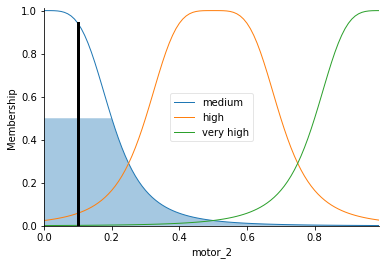

In [18]:
motor_2.view(sim=motion)
print(motion.output['motor_2'])

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.6283333333333333


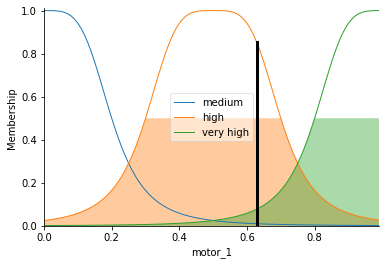

In [19]:
motor_1.view(sim=motion)
print(motion.output['motor_1'])